# Python Portfolio Project


## Part 1 - Solutions to Python portfolio tasks

## Data Processing

### Q1. Import dataset.csv. Devolop notebook cells to check the dataframe for 'data cleaning' issues (Missing values, unnecessary duplicates, wrong datatypes, wrong values) and resolve them. Provide mean, median, range for the column 'median house value'. Convert currency values in 'median_income' column to USD and visualize the entire updated dataframe.

##### Python code as follows

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
# Download the Dataset.csv file from Moodle
# Load Dataset.csv file into a data frame
MyDataFrame = pd.read_csv('Dataset.csv', delimiter=',') #Delimiter is set to , as it is csv
# Print the entire data frame on the screen
print(MyDataFrame.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322         8.3252              452600        NEAR BAY
1     -122.23     37.88             41.0000          880         322         8.3252              452600        NEAR BAY
2     -122.22     37.86             21.0000         7099        2401         8.3014              358500        NEAR BAY
3     -122.25     37.84             52.0001         3104        1157         3.1200              241400        NEAR BAY
4     -122.26     37.85             52.0000         3503        1504         3.2705              241800        NEAR BAY
5     -121.65     39.32             40.0000          812         374         2.7891               73500          INLAND
6     -121.69     39.36             29.0000         2220        1170         2.3224               56200          INLAND
7     -121.70     39.37             32.0

#### Finding and replacing missing values is a key part of data cleaning process. To find the missing values throughout the dataset, we run the isnull() fucntion. If it returns 'true' for any value, it means that particular value is missing. 

In [3]:
# Look for missing values
MyDataFrame.isnull()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


#### Since we do not know the actual missing value, we take the closest value or an average of the column to replace the null values. 

In [4]:
# Replace the missing values
MyDataFrame.at[11, 'ocean_proximity'] = 'INLAND' # Closest ocean_proximity to the given longitude & latitude
MyDataFrame.at[20, 'median_income'] = MyDataFrame.median_income.mean() # Average of median_income
# Print the entire data frame on the screen
print(MyDataFrame.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322       8.325200              452600        NEAR BAY
1     -122.23     37.88             41.0000          880         322       8.325200              452600        NEAR BAY
2     -122.22     37.86             21.0000         7099        2401       8.301400              358500        NEAR BAY
3     -122.25     37.84             52.0001         3104        1157       3.120000              241400        NEAR BAY
4     -122.26     37.85             52.0000         3503        1504       3.270500              241800        NEAR BAY
5     -121.65     39.32             40.0000          812         374       2.789100               73500          INLAND
6     -121.69     39.36             29.0000         2220        1170       2.322400               56200          INLAND
7     -121.70     39.37             32.0

#### Unnecessary duplicates affect the integrity of data. Hence the redundant data must be removed. To find the duplicates, we use the duplicated() function. If it returns true for a row, it means that row is duplicated.

In [5]:
# Show which rows are duplicated
print(MyDataFrame.duplicated())

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
dtype: bool


In [6]:
# Remove duplicated row
MyDataFrame=MyDataFrame.drop_duplicates()
# Reset the indices with the 'in-place' option
MyDataFrame.reset_index(drop=True, inplace=True)
# Print data frame
print(MyDataFrame.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88             41.0000          880         322       8.325200              452600        NEAR BAY
1     -122.22     37.86             21.0000         7099        2401       8.301400              358500        NEAR BAY
2     -122.25     37.84             52.0001         3104        1157       3.120000              241400        NEAR BAY
3     -122.26     37.85             52.0000         3503        1504       3.270500              241800        NEAR BAY
4     -121.65     39.32             40.0000          812         374       2.789100               73500          INLAND
5     -121.69     39.36             29.0000         2220        1170       2.322400               56200          INLAND
6     -121.70     39.37             32.0000         1852         911       1.788500               57000          INLAND
7     -121.70     39.36             46.0

#### Wrong datatypes may result in inappropriate values in a dataset. Here, the age is in float. We do not calculate age in decimal points. Hence it can be changed to int. 

In [7]:
# Changing the data type from floating point to integer for housing_median_age
MyDataFrame.at[2, 'housing_median_age'] = int(MyDataFrame.at[2, 'housing_median_age'])
# Display the updated data frame
print(MyDataFrame.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88                41.0          880         322       8.325200              452600        NEAR BAY
1     -122.22     37.86                21.0         7099        2401       8.301400              358500        NEAR BAY
2     -122.25     37.84                52.0         3104        1157       3.120000              241400        NEAR BAY
3     -122.26     37.85                52.0         3503        1504       3.270500              241800        NEAR BAY
4     -121.65     39.32                40.0          812         374       2.789100               73500          INLAND
5     -121.69     39.36                29.0         2220        1170       2.322400               56200          INLAND
6     -121.70     39.37                32.0         1852         911       1.788500               57000          INLAND
7     -121.70     39.36                4

#### Wrong values are often easy to detect as they do not make sense amidst a group of data. These wrong values must be corrected for the overall quality of the dataset. In the column ocean_proximity, we have two values "NEAR O". With close proximity data having "NEAR OCEAN" as the value, these values are obviously incomplete, and hence wrong. These must be changed to the expected values. 

In [8]:
# Changing the value at ocean_proximity with index 16 & 17
MyDataFrame.at[16, 'ocean_proximity'] = 'NEAR OCEAN'
MyDataFrame.at[17, 'ocean_proximity'] = 'NEAR OCEAN'
# Display the updated data frame
print(MyDataFrame.to_string())

    longitude  latitude  housing_median_age  total_rooms  population  median_income  median_house_value ocean_proximity
0     -122.23     37.88                41.0          880         322       8.325200              452600        NEAR BAY
1     -122.22     37.86                21.0         7099        2401       8.301400              358500        NEAR BAY
2     -122.25     37.84                52.0         3104        1157       3.120000              241400        NEAR BAY
3     -122.26     37.85                52.0         3503        1504       3.270500              241800        NEAR BAY
4     -121.65     39.32                40.0          812         374       2.789100               73500          INLAND
5     -121.69     39.36                29.0         2220        1170       2.322400               56200          INLAND
6     -121.70     39.37                32.0         1852         911       1.788500               57000          INLAND
7     -121.70     39.36                4

In [9]:
MyDataFrame.to_csv('UpdatedDataset.csv', sep='\t', encoding='utf-8')

In [10]:
print('Mean = ',MyDataFrame.median_house_value.mean())
print('Median = ',MyDataFrame.median_house_value.median())
print('Range = ',MyDataFrame.median_house_value.max()-MyDataFrame.median_income.min())

Mean =  174730.76923076922
Median =  90200.0
Range =  452598.3346


In [11]:
#Converting 'median_income' to USD
MyDataFrame['median_income'] = MyDataFrame['median_income'].apply(lambda x: f"${x*100000:,.2f}")
#visualise the entire updated data frame
print(MyDataFrame)

    longitude  latitude  housing_median_age  total_rooms  population  \
0     -122.23     37.88                41.0          880         322   
1     -122.22     37.86                21.0         7099        2401   
2     -122.25     37.84                52.0         3104        1157   
3     -122.26     37.85                52.0         3503        1504   
4     -121.65     39.32                40.0          812         374   
5     -121.69     39.36                29.0         2220        1170   
6     -121.70     39.37                32.0         1852         911   
7     -121.70     39.36                46.0         1210         523   
8     -121.70     39.36                37.0         2330        1505   
9     -121.69     39.36                34.0          842         635   
10    -121.74     39.38                27.0         2596        1100   
11    -121.80     39.33                30.0         1019         501   
12    -120.46     38.15                16.0         4221        

## Statistics with Python

### Q1. Initialise a two-dimensional array consisting of 5 rows and 10 columns of uniformly distributed data points of integer values from the interval [0..9]. Consider each row of the two-dimensional array as an independent dataset. Display the values on the screen as a table. Plot the first two rows on a single diagram with different colours.

##### Python code as follows

In [12]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Initialize 2 dimensional array consisting 5 rows & 10 columns
MyDataset = np.empty(shape=(5,10),dtype='int')
# Map array to uniformly distributed int values from the interval [0..9]
for i in range(0,5):
    for j in range(0,10):
        MyDataset[i,j] = int(np.random.randint(0,9))
# Print values as a table
print(MyDataset)

[[8 5 6 4 4 0 2 7 5 1]
 [0 5 5 7 6 7 0 7 4 7]
 [0 4 3 2 8 4 1 3 4 1]
 [4 2 7 7 5 5 0 2 7 6]
 [3 5 3 0 0 3 1 3 4 6]]


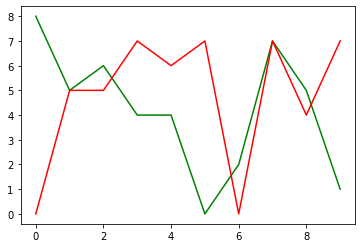

In [39]:
# Plot the 2 rows as a single diagram in different colors 
plt.plot(MyDataset[0, ], color = 'g')
plt.plot(MyDataset[1, ], color = 'r')
# Visualise the plot
plt.show()

### Q2. Provide mean, median and standard deviation for each individual row.

##### Python code as follows

In [40]:
# Find Mean, Median and Standard Deviation by row
MeanByRow = np.mean(MyDataset, axis=1)
MedianByRow = np.median(MyDataset, axis=1)
SDbyRow = np.std(MyDataset, axis=1)
# Print Mean, Median and Standard Deviation by row
print('Mean by row = ',MeanByRow)
print('Median by row = ',MedianByRow)
print('Standard Deviation by row = ', SDbyRow)

Mean by row =  [4.2 4.8 3.  4.5 2.8]
Median by row =  [4.5 5.5 3.  5.  3. ]
Standard Deviation by row =  [2.44131112 2.6        2.14476106 2.33452351 1.88679623]


### Q3. Initialise a one-dimensional array representing a normal distribution of 1000 data points with mean value 17 and standard deviation 0.2.

##### Python code as follows

In [16]:
# Initialize parameters for array
mean = float(17)
SD = float(0.2)
size = int(1000)
# Initialize an array representing a normal distribution of 1000 data points, mean = 17 and standard deviation = 0.2
N = np.random.normal(mean,SD,size)

### Q4. Find the maximum and the minimum values of the dataset and calculate the range.

##### Python code as follows

In [17]:
# Find maximum value of the dataset
max1 = N.max()
print('Maximum value of the dataset = ',max1)
# Find minimum value of the dataset
min1 = N.min()
print('Minimum value of the dataset = ',min1)
# Calculate the Range
range_1 = max1-min1
print('Range of the dataset = ',range_1)

Maximum value of the dataset =  17.594733969987615
Minimum value of the dataset =  16.39008860610899
Range of the dataset =  1.204645363878626


### Q5. Visualise the dataset by using a histogram with 10 bins. Visualise the probability density function.

##### Python code as follows

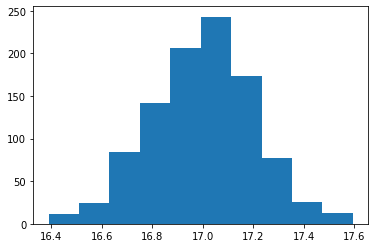

In [18]:
# Visualise the dataset by using a histogram with 10 bins
plt.hist(N, bins=10)
plt.show()

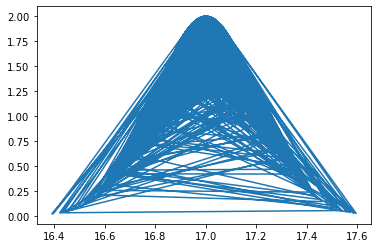

In [19]:
# Visualise the probability density function
f = (1/(SD*np.sqrt(2*np.pi)))*np.exp(-((N-mean)**2/(2*SD**2)))
plt.plot(N,f)
plt.show()

## Algebra in Practise

### Q1. Initialize the following matrix A. Find the determinant, the trace and the inverse of matrix A.

##### Python code as follows

In [20]:
#import libraries
import numpy as np

In [21]:
# Initialize Matrix A

A = np.array([[2,5,1],[4,3,7],[1,3,2]])
print('A =',A)

A = [[2 5 1]
 [4 3 7]
 [1 3 2]]


In [22]:
# Find the determinant of Marix A
D = np.linalg.det(A)
print('The Determinant of Matrix A = ',int(D))

# Find the Trace of Matrix A
T = np.trace(A)
print('The trace of Matrix A = ',T)

# Find the inverse of matrix A
I = np.linalg.inv(A)
print('The Inverse of Matrix A = ',I)

The Determinant of Matrix A =  -26
The trace of Matrix A =  7
The Inverse of Matrix A =  [[ 0.57692308  0.26923077 -1.23076923]
 [ 0.03846154 -0.11538462  0.38461538]
 [-0.34615385  0.03846154  0.53846154]]


### Q2. Initialise the square matrices B and C. Find the product P of the matrices B and C by using the Python function for matrix multiplication. Display the result on the screen.

##### Pyhton code as follows

In [23]:
# initialize square matrices B & C
B = np.array([[4,7,2],[3,2,5],[6,4,3]])
C = np.array([[3,1,9],[7,5,8],[2,1,1]])

# Find product P of matrices B & C
P = np.matmul(B,C)

# Display the result
print('P =', P)

P = [[65 41 94]
 [33 18 48]
 [52 29 89]]


### Q3. Consider the following linear equations:
### 3x + 2y - z = 25
### 2x - y + 4z = 19
### 4x - 2y +3z = 18
### Represent the system of linear equations using matrices

##### Python code as follows

In [24]:
# Representing a system of linear equation using matrices
M = np.array([[3,2,-1],[2,-1,4],[4,-2,3]])
X = np.array(['x','y','z'])
C = np.array([[1],[4],[7]])

# Display matrices
print('M =',M)
print('X=',X)
print('C=',C)

M = [[ 3  2 -1]
 [ 2 -1  4]
 [ 4 -2  3]]
X= ['x' 'y' 'z']
C= [[1]
 [4]
 [7]]


### Q4. Provide the algebraic steps for solving the system of linear equations from Task 3 by using matrix notation.

### Q5. Solve the system of linear equations from Task 3 by using Python script utilising matrix multiplication and inverse matrix.

##### Python code as follows

In [25]:
# Solve the system of linear equations from Task 3 by utilising matrix multiplication and inverse matrix

# Initialize Matrix M as a 3x3 Matrix with given equation
M = np.array([[3,2,-1],[2,-1,4],[4,-2,3]])
# Calculate the inverse of M
M1 = np.linalg.inv(M)
# Initialize Matrix C
C = np.array([[1],[4],[7]])
# Calculate X=M1*C
X = np.matmul(M1,C)
# Display Matrix X
print('X = ', X)

X =  [[ 1.08571429]
 [-1.02857143]
 [ 0.2       ]]


## Data Visualization with Python

### Q1. Develop a graph which represents the public transport network of a city of your choice. Some cities have extensive public transport networks. In such case, represent minimum 3 lines with minimum 4 stations on each line. When visualising the network, use different colours for the different lines and their corresponding stations. Provide attributes to the edges which correspond to the distances between stations and visualise them. If the actual distances between the stations are not available, approximate them by using online map services. Visualise the names of the stations.

##### Python code as follows

###### Representation of a part of the transport network of the city Chennai, India.

In [53]:
#import libraries

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pandas.plotting import parallel_coordinates

In [27]:
#Create Graph Object

MyGraph = nx.Graph()

In [28]:
#Add nodes with attributes node position and colour code of the node

#Chennai Metro Line (Colour Green)
MyGraph.add_node('A',npos=(10,10),ccn='#00FF00')
MyGraph.add_node('B',npos=(25,19),ccn='#00FF00')
MyGraph.add_node('C',npos=(34,34),ccn='#00FF00')
MyGraph.add_node('D',npos=(56,56),ccn='#00FF00')
MyGraph.add_node('E',npos=(73,73),ccn='#00FF00')

# Chennai EMU Line (Colour Pink)
MyGraph.add_node('F',npos=(50,20),ccn='#FF66CC')
MyGraph.add_node('G',npos=(69,40),ccn='#FF66CC')
MyGraph.add_node('H',npos=(80,60),ccn='#FF66CC')
MyGraph.add_node('I',npos=(96,80),ccn='#FF66CC')

# Chennai MRTS Line (Colour Orange)
MyGraph.add_node('J',npos=(20,-20),ccn='#FF6600')
MyGraph.add_node('K',npos=(40,-40),ccn='#FF6600')
MyGraph.add_node('L',npos=(60,-60),ccn='#FF6600')
MyGraph.add_node('M',npos=(80,-80),ccn='#FF6600')

In [29]:
#Connect the nodes with corresponding colour

#Chennai Metro Line (Colour Green)
MyGraph.add_edge('A','B',cce='#00FF00',distance='3.5 km')
MyGraph.add_edge('B','C',cce='#00FF00',distance='3 km')
MyGraph.add_edge('C','D',cce='#00FF00',distance='5.5 km')
MyGraph.add_edge('D','E',cce='#00FF00',distance='5 km')

#Chennai EMU Line (Colour Pink)
MyGraph.add_edge('A','F',cce='#FF66CC',distance='10 km')
MyGraph.add_edge('F','G',cce='#FF66CC',distance='6 km')
MyGraph.add_edge('G','H',cce='#FF66CC',distance='4 km')
MyGraph.add_edge('H','I',cce='#FF66CC',distance='5.2 km')

#Chennai MRTS Line (Colour Orange)
MyGraph.add_edge('A','J',cce='#FF6600',distance='5 km')
MyGraph.add_edge('J','K',cce='#FF6600',distance='5.2 km')
MyGraph.add_edge('K','L',cce='#FF6600',distance='5.6 km')
MyGraph.add_edge('L','M',cce='#FF6600',distance='5.7 km')

In [30]:
nx.get_edge_attributes(MyGraph,'distance')

{('A', 'B'): '3.5 km',
 ('A', 'F'): '10 km',
 ('A', 'J'): '5 km',
 ('B', 'C'): '3 km',
 ('C', 'D'): '5.5 km',
 ('D', 'E'): '5 km',
 ('F', 'G'): '6 km',
 ('G', 'H'): '4 km',
 ('H', 'I'): '5.2 km',
 ('J', 'K'): '5.2 km',
 ('K', 'L'): '5.6 km',
 ('L', 'M'): '5.7 km'}

In [31]:
# Extract attributes from graph to dictionaries

pos = nx.get_node_attributes(MyGraph,'npos')
nodecolour = nx.get_node_attributes(MyGraph,'ccn')
edgecolour = nx.get_edge_attributes(MyGraph,'cce')

In [32]:
# Place the values from the dictionaries in lists
pos_list = list(pos.values())
NodeList = list(nodecolour.values())
EdgeList= list(edgecolour.values())

In [33]:
#Assign station names to a variable
area_names = ['St. Thomas Mount','Alandur','Eekkaatuthangal','Ashok Nagar','Vadapalani','Guindy','Saidapet','Mambalam','Kodambakkam','Adambakkam','Velachery','Perungudi','Taramani']

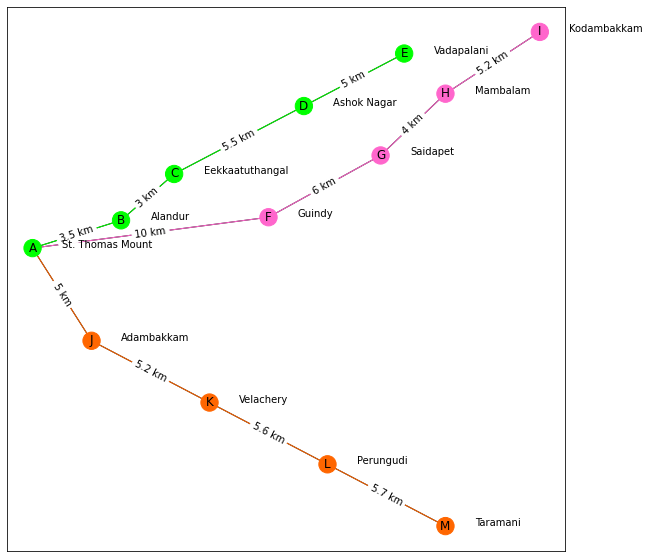

In [34]:
# Display the name of the stations
plt.figure(figsize=(10,10))

area_names = ['St. Thomas Mount','Alandur','Eekkaatuthangal','Ashok Nagar','Vadapalani','Guindy','Saidapet','Mambalam','Kodambakkam','Adambakkam','Velachery','Perungudi','Taramani']
for idx in range(len(area_names)):
    plt.text(pos_list[idx][0]+5,pos_list[idx][1],s=area_names[idx])

# Draw the graph's nodes and edges

nx.draw_networkx(MyGraph, pos, node_color=NodeList)
nx.draw_networkx_edges(MyGraph, pos, edge_color=EdgeList)
nx.draw_networkx_edge_labels(MyGraph,pos,edge_labels=nx.get_edge_attributes(MyGraph,'distance'))

# Visualise the graph
plt.show()

### Q2. Find the average monthly temperatures of three cities of your choice. Represent the data by using a heat map. Provide a colour scale for guidance. Allow the user to specify a threshold for the heat map. Based on this threshold value, use different base colours when representing the data points.

##### Python code as follows

          City   1   2   3   4   5   6   7   8   9  10  11  12
0      Phoenix   6   8  11  16  21  25  27  26  23  17  10   6
1  Little Rock   4   6  12  17  21  25  28  27  23  17  11   6
2   Sacramento   9  11  13  15  18  21  23  23  21  17  13   9
3       Denver  -2   1   5   9  14  20  23  21  17  10   3  -2
4     Hartford  -2   1   4  10  15  21  24  23  19  12   7   1
5        Dover   1   2   6  12  17  22  25  24  20  14   8   3
6  Tallahassee  15  17  19  22  25  27  27  27  26  23  20  17

Enter the threshold: 17


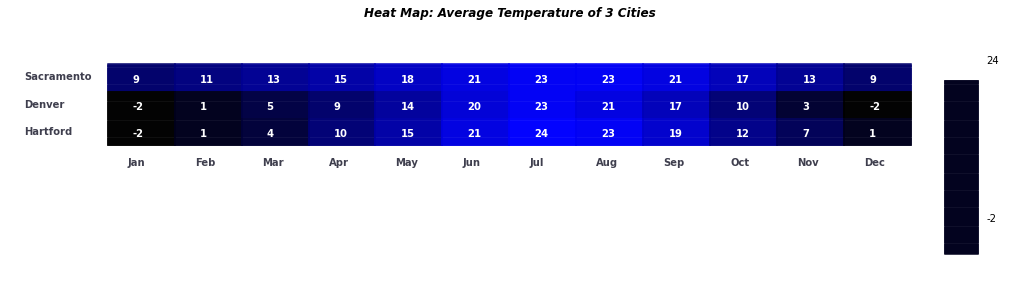

In [52]:
# This subroutine encapsulates the 'plot' method, as the most suitable for raster rendering
def DrawBox(x, y, size, r, g, b):
    if r < 0:
        r = int(0)
    if g < 0:
        g = int(0)
    if b < 0:
        b = int(0)
    if r > 255:
        r = int(255)
    if g > 255:
        g = int(255)
    if b > 255:
        b = int(255)
    for i in range(0, int(size)):
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))

# Store the dataset into a data frame
df = pd.read_csv('HeatMap.csv')
#df['mean'] = df.mean(axis=1)
# Print the content on the screen
print(df.head(7))
df = df.drop([0,1,5,6])

# Set the plot
plt.figure(figsize=(18, 5))
plt.axis([0, 600, 0, 400])
plt.xticks([])
plt.yticks([])
plt.axis('off')

Min_1 = int(min(df.min(numeric_only=True)))
Max_1 = int(max(df.max(numeric_only=True)))

BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)


# Generate the heat map
Threshold1 = int(input("\nEnter the threshold: "))
for i in range(0, df.shape[0]):
    for j in range(1, df.shape[1]):
        ColourCode = int(((df.values[i, j]-Min_1)/(Max_1-Min_1))*255)
        DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, 0, 0, ColourCode )
        if df.values[i, j] > Threshold1:
            plt.text(OffsetX+20+BoxSize*j, OffsetY+300-BoxSize*i, str(df.values[i, j]), color ='white', fontweight='bold')
        if df.values[i, j] <= Threshold1:
            plt.text(OffsetX+20+BoxSize*j, OffsetY+300-BoxSize*i, str(df.values[i, j]), color ='white', fontweight='bold')

for i in range(0, 256):
    plt.plot([560, 580], [i + 60, i + 60], '#{:02x}{:02x}{:02x}'.format(0, 0, ColourCode))

plt.text(585, 108, Min_1)
plt.text(585, 340, Max_1)



plt.text( 72, 190, 'Jan', fontweight='bold', color='#3F3F4E')
plt.text(112, 190, 'Feb', fontweight='bold', color='#3F3F4E')
plt.text(152, 190, 'Mar', fontweight='bold', color='#3F3F4E')
plt.text(192, 190, 'Apr', fontweight='bold', color='#3F3F4E')
plt.text(232, 190, 'May', fontweight='bold', color='#3F3F4E')
plt.text(272, 190, 'Jun', fontweight='bold', color='#3F3F4E')
plt.text(312, 190, 'Jul', fontweight='bold', color='#3F3F4E')
plt.text(352, 190, 'Aug', fontweight='bold', color='#3F3F4E')
plt.text(392, 190, 'Sep', fontweight='bold', color='#3F3F4E')
plt.text(432, 190, 'Oct', fontweight='bold', color='#3F3F4E')
plt.text(472, 190, 'Nov', fontweight='bold', color='#3F3F4E')
plt.text(512, 190, 'Dec', fontweight='bold', color='#3F3F4E')



#display city
plt.text(10, 316, str(df.values[0, 0]), fontweight='bold', color='#3F3F4E')
plt.text(10, 275, str(df.values[1, 0]), fontweight='bold', color='#3F3F4E')
plt.text(10, 235, str(df.values[2, 0]), fontweight='bold', color='#3F3F4E')



#set title for the image
plt.title('Heat Map: Average Temperature of 3 Cities', fontstyle='italic', fontweight='bold')



#display the plotted heat map
plt.show()

### Q3. Represent the data from Task 2 by using parallel coordinates. Use different colours for each city's average monthly temperatures.

##### Python code as follows

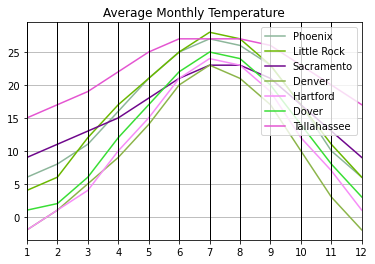

In [54]:
#Fetching data

data = pd.read_csv(r'HeatMap.csv',sep=',')

#Passing the dataset column in parallel coordinates
parallel_coordinates(data, 'City')

plt.title("Average Monthly Temperature")

#Display the parallel coordinates

plt.show()